In [23]:
import pandas as pd
import numpy as np

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
import cv2

2.1.0


In [25]:
import os

In [26]:
img_width=150
img_height=150

In [27]:
train  =   (r'C:\Users\tarun\Downloads\Data Augmented folder\Train')

In [28]:
test   =   (r'C:\Users\tarun\Downloads\Data Augmented folder\Test')

In [29]:
train_sample=100
test_sample=50
epochs=15
batch_size=20

In [30]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = ( img_width, img_height,3)


In [31]:
train_datagen=ImageDataGenerator(
     rescale=1./255,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True

)

In [32]:
test_datagen=ImageDataGenerator(
    rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary'
    
)

Found 1200 images belonging to 2 classes.


In [34]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=input_shape))
model.add( Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary()

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
__________________________________

In [36]:
from PIL import Image
from IPython.display import display
from PIL import Image

In [37]:

history=model.fit_generator(
    train_generator,
    steps_per_epoch=train_sample,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_sample
)

Epoch 1/15
100/100 [==============================] - 55s 551ms/step - loss: 0.7303 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5050
Epoch 2/15
100/100 [==============================] - 56s 555ms/step - loss: 0.6941 - accuracy: 0.5005 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 3/15
100/100 [==============================] - 54s 540ms/step - loss: 0.6942 - accuracy: 0.5030 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 4/15
100/100 [==============================] - 54s 542ms/step - loss: 0.6945 - accuracy: 0.5115 - val_loss: 0.6934 - val_accuracy: 0.5700
Epoch 5/15
100/100 [==============================] - 59s 589ms/step - loss: 0.6947 - accuracy: 0.5050 - val_loss: 0.6715 - val_accuracy: 0.5650
Epoch 6/15
100/100 [==============================] - 59s 588ms/step - loss: 0.6918 - accuracy: 0.5145 - val_loss: 0.6742 - val_accuracy: 0.6350
Epoch 7/15
100/100 [==============================] - 57s 570ms/step - loss: 0.6892 - accuracy: 0.5280 - val_loss: 0.6504 - val_ac

In [38]:
history.history    

{'val_loss': [0.6945962309837341,
  0.696675181388855,
  0.7037103772163391,
  0.6933948397636414,
  0.6714994311332703,
  0.6741604804992676,
  0.6503514051437378,
  0.6213948130607605,
  0.6249932646751404,
  0.5464082956314087,
  0.5180321931838989,
  0.4845708906650543,
  0.5704265832901001,
  0.46597737073898315,
  0.5971649289131165],
 'val_accuracy': [0.5049999952316284,
  0.5,
  0.5,
  0.5699999928474426,
  0.5649999976158142,
  0.6349999904632568,
  0.5450000166893005,
  0.7450000047683716,
  0.699999988079071,
  0.7200000286102295,
  0.7749999761581421,
  0.8450000286102295,
  0.800000011920929,
  0.7850000262260437,
  0.824999988079071],
 'loss': [0.7302560669183731,
  0.6941168934106827,
  0.6941658437252045,
  0.6945099359750748,
  0.6947467970848084,
  0.6918321418762207,
  0.6891997927427291,
  0.6932806575298309,
  0.6861381661891938,
  0.6839920371770859,
  0.6824378848075867,
  0.6853545033931732,
  0.6814607751369476,
  0.6753086113929748,
  0.6842213469743729],
 'ac

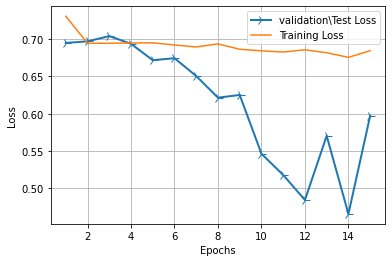

In [39]:
import matplotlib.pyplot as plt

history_dict=history.history

loss_values=history_dict["loss"]
val_loss_value=history_dict["val_loss"]
epochs=range(1, len(loss_values) +1)


line1=plt.plot(epochs , val_loss_value , label='validation\Test Loss')
line2=plt.plot(epochs , loss_values, label='Training Loss')
plt.setp(line1 ,linewidth=2.0 ,marker='+',markersize=10.0)
plt.setp(line1 ,linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid("True")
plt.legend()
plt.show()

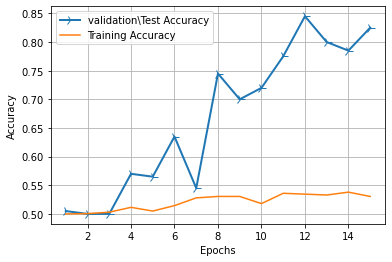

In [40]:
import matplotlib.pyplot as plt

history_dict=history.history

acc_values=history_dict["accuracy"]
val_acc_value=history_dict["val_accuracy"]
epochs=range(1, len(acc_values) +1)


line1=plt.plot(epochs , val_acc_value , label='validation\Test Accuracy')
line2=plt.plot(epochs , acc_values, label='Training Accuracy')
plt.setp(line1 ,linewidth=2.0 ,marker='+',markersize=10.0)
plt.setp(line1 ,linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid("True")
plt.legend()
plt.show()

In [41]:
model.save("jeans_traouser_cnn.h5")

In [42]:
import cv2
cv2.__version__

'4.3.0'

In [43]:
from keras.models import  load_model

classifier= load_model("jeans_traouser_cnn.h5")

In [44]:
import cv2
import numpy as np

def draw_test(name,pred , input_im):
  BLACK = [0,0,0]
  expand_image= cv2.copymakeBorder(input_im , 0,0,0, imageL.shape[0] , cv2.BORDER_CONSTANT,value=BLACK)
  expand_image= CV2.cvtcolor(expand_image , cv2.COLOR_GRAY2BGR)
  cv2.puttext(expand_image , str(pred) , (150,70) , cv2.FONT_HERSHEY_COMPLEX_SMALL ,4 , (0,255,0), 2)
  Cv2.imshow(name , expand_image)




  for i in range(0,10):
    rand=np.random.randint(0,len(test_generator))
    input_im= test_generator[rand]


    imageL=cv2.resize(input_im , None , fx=4 , fy=4 , interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)


    res = str(classifier.predict_classes(input_im , 1, verbose=0)[0])

    draw_test("prediction", res , imageL)
    cv2.waitkey(0)

cv2.destroyAllWindows()